In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
dataset = pd.read_csv('Advertising.csv')

In [ ]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Sales, TV


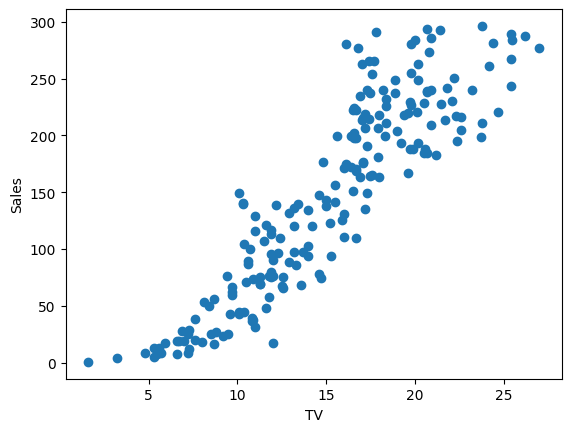

In [ ]:
plt.plot(dataset["Sales"],dataset["TV"],'o')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [ ]:
df=dataset[['TV','Sales']]
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [ ]:
x=dataset.TV
y=dataset.Sales

In [ ]:
x.shape

(200,)

In [ ]:
y.shape

(200,)

In [ ]:
X=dataset.TV.values
Y=dataset.Sales.values
X

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [ ]:
X.shape

(200,)

In [ ]:
x=dataset.TV.values.reshape(200,1)
y=dataset.Sales.values.reshape(200,1)

In [ ]:
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


# Découpage


In [ ]:
# découpage du dataset en dataset d'entrainement et dataset de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [ ]:
X_train=np.hstack((x_train,(np.ones(x_train.shape))))
X_test=np.hstack((x_test,(np.ones(x_test.shape))))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 2)
(40, 2)
(160, 1)
(40, 1)


In [ ]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(2,1)
print('Theta:',theta)

Theta: [[1.76405235]
 [0.40015721]]


In [ ]:
def model(X, theta):
    return X.dot(theta)

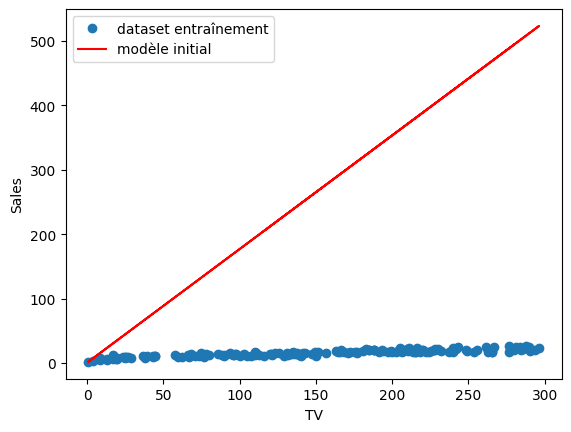

In [ ]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta), c='r',label='modèle initial')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [ ]:
cost_function(X_train, y_train, theta)

41517.355521861005

In [ ]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [ ]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history

In [ ]:
n_iterations = 1000000
learning_rate = 0.00001


theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

In [ ]:
cost_history # l'historique de la fonction coût qu'on va afficher par la suite. on remarque que sa valeur déminue et c'est ça l'objectif

array([2.05872454e+04, 1.02105810e+04, 5.06607083e+03, ...,
       2.54289005e+00, 2.54288984e+00, 2.54288963e+00])

In [ ]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[0.05854572],
       [6.40305225]])

In [ ]:
theta_final[0]

array([0.05854572])

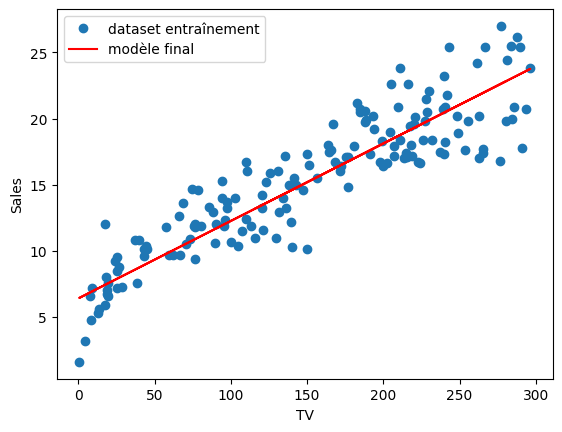

In [ ]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta_final), c='r',label='modèle final')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

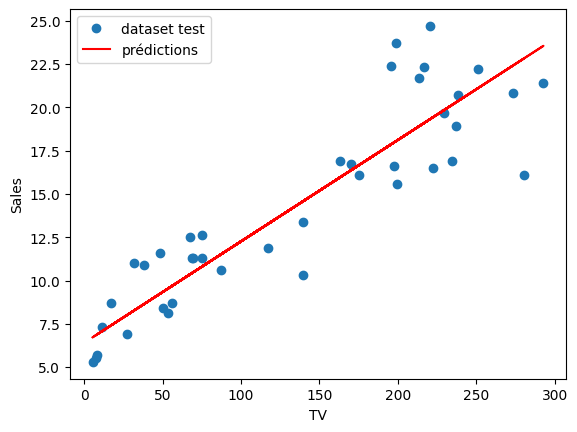

In [ ]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X_test, theta_final)

# Affichage des résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.plot(x_test,y_test,'o',label='dataset test')
plt.plot(x_test,predictions , c='r',label='prédictions')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
# Test: # prédire quelle serait la largeur d'un pétale qui a une longueur de 2,5 cm
X_2_5= np.array([230,1])
pred_y_2_5=model(X_2_5, theta_final)
print(pred_y_2_5)

[19.86856793]


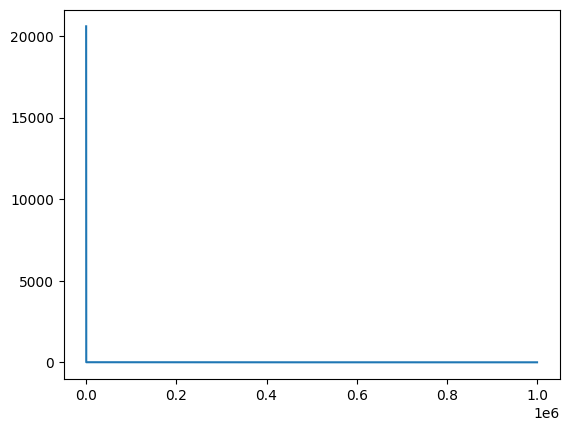

In [ ]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
TV_coef_train = coef_determination(y_train, model(X_train, theta_final)) # predictions=model(X_test,theta_final)
TV_coef_train


0.8102276883921965

In [ ]:
TV_coef_test = coef_determination(y_test, model(X_test, theta_final))
TV_coef_test

0.8005190051199944

In [ ]:
TV_correlation = dataset['TV'].corr(dataset['Sales'])
TV_correlation

0.9012079133023306

# RADIO, Sales


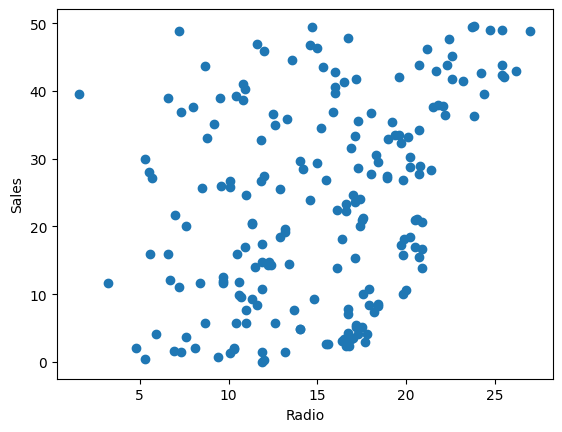

In [ ]:
plt.plot(dataset["Sales"],dataset["Radio"],'o')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

In [ ]:
df=dataset[['Radio','Sales']]
df

,Radio,Sales
0,37.8,22.1
1,39.3,10.4
2,45.9,12.0
3,41.3,16.5
4,10.8,17.9
...,...,...
195,3.7,7.6
196,4.9,14.0
197,9.3,14.8
198,42.0,25.5


In [ ]:
x=dataset.Radio
y=dataset.Sales

In [ ]:
x.shape

(200,)

In [ ]:
y.shape

(200,)

In [ ]:
X=dataset.TV.values
Y=dataset.Sales.values
X

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [ ]:
X.shape

(200,)

In [ ]:
x=dataset.Radio.values.reshape(200,1)
y=dataset.Sales.values.reshape(200,1)

In [ ]:
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


In [ ]:
# découpage du dataset en dataset d'entrainement et dataset de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [ ]:
X_train=np.hstack((x_train,(np.ones(x_train.shape))))
X_test=np.hstack((x_test,(np.ones(x_test.shape))))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 2)
(40, 2)
(160, 1)
(40, 1)


In [ ]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(2,1)
print('Theta:',theta)

Theta: [[1.76405235]
 [0.40015721]]


In [ ]:
def model(X, theta):
    return X.dot(theta)

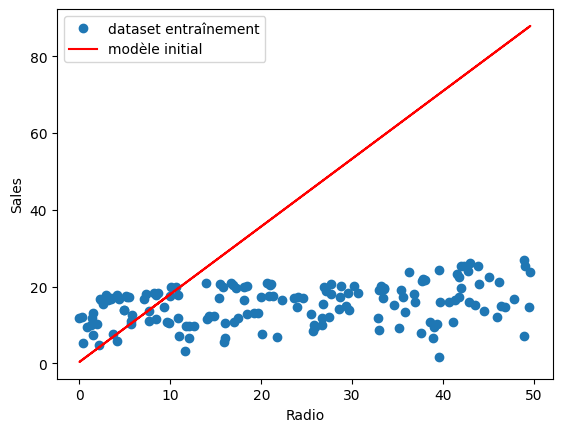

In [ ]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta), c='r',label='modèle initial')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [ ]:
cost_function(X_train, y_train, theta)

629.3835846941762

In [ ]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [ ]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history

In [ ]:
n_iterations = 10000
learning_rate = 0.001


theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

In [ ]:
cost_history # l'historique de la fonction coût qu'on va afficher par la suite. on remarque que sa valeur déminue et c'est ça l'objectif

array([73.47802966, 36.41250467, 33.9299071 , ..., 11.89316854,
       11.89313223, 11.89309593])

In [ ]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[ 0.1400213 ],
       [11.93717294]])

In [ ]:
theta_final[0]

array([0.1400213])

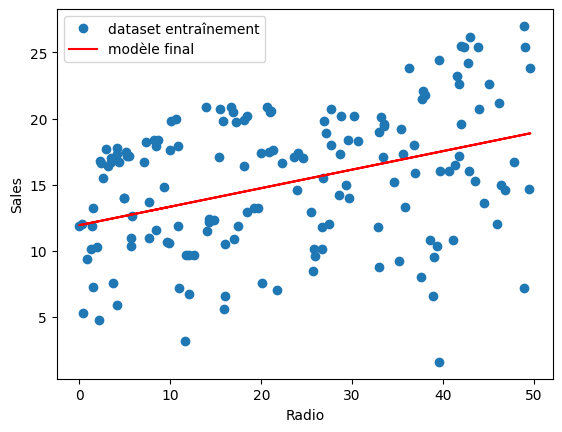

In [ ]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta_final), c='r',label='modèle final')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.show()

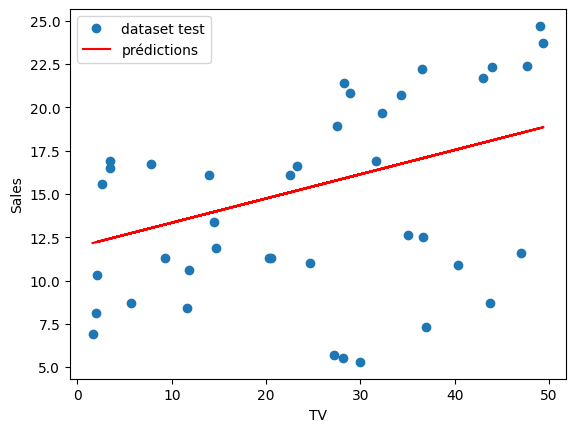

In [ ]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X_test, theta_final)

# Affichage des résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.plot(x_test,y_test,'o',label='dataset test')
plt.plot(x_test,predictions , c='r',label='prédictions')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

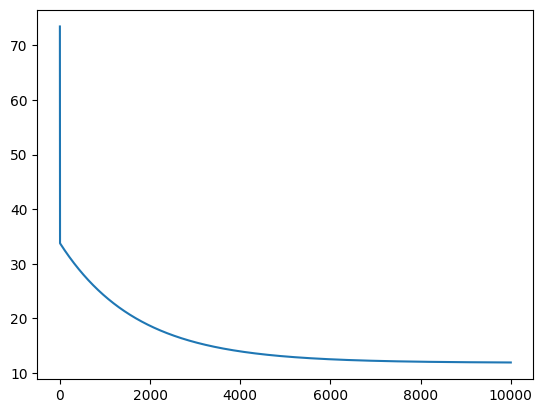

In [ ]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
Radio_coef_train = coef_determination(y_train, model(X_train, theta_final))
Radio_coef_train

0.1124348154931386

In [ ]:
Radio_coef_test = coef_determination(y_test, model(X_test, theta_final))
Radio_coef_test

0.12422007053313411

In [ ]:
Radio_correlation = dataset['Radio'].corr(dataset['Sales'])
Radio_correlation

0.3496310970076693

#News Paper, Sales

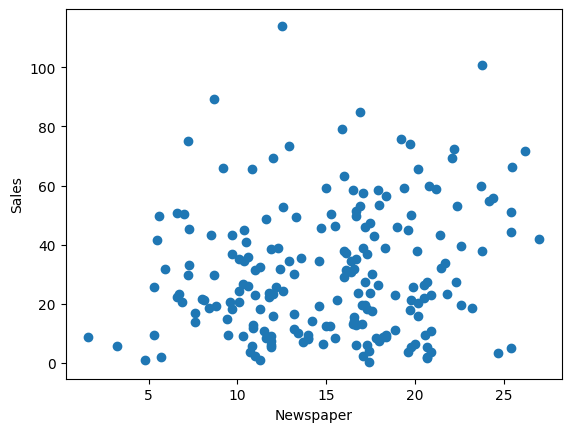

In [ ]:
plt.plot(dataset["Sales"],dataset["Newspaper"],'o')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

In [ ]:
df=dataset[['Newspaper','Sales']]
df

,Newspaper,Sales
0,69.2,22.1
1,45.1,10.4
2,69.3,12.0
3,58.5,16.5
4,58.4,17.9
...,...,...
195,13.8,7.6
196,8.1,14.0
197,6.4,14.8
198,66.2,25.5


In [ ]:
x=dataset.Newspaper
y=dataset.Sales

In [ ]:
x.shape

(200,)

In [ ]:
y.shape

(200,)

In [ ]:
X=dataset.Newspaper.values
Y=dataset.Sales.values
X

array([ 69.2,  45.1,  69.3,  58.5,  58.4,  75. ,  23.5,  11.6,   1. ,
        21.2,  24.2,   4. ,  65.9,   7.2,  46. ,  52.9, 114. ,  55.8,
        18.3,  19.1,  53.4,  23.5,  49.6,  26.2,  18.3,  19.5,  12.6,
        22.9,  22.9,  40.8,  43.2,  38.6,  30. ,   0.3,   7.4,   8.5,
         5. ,  45.7,  35.1,  32. ,  31.6,  38.7,   1.8,  26.4,  43.3,
        31.5,  35.7,  18.5,  49.9,  36.8,  34.6,   3.6,  39.6,  58.7,
        15.9,  60. ,  41.4,  16.6,  37.7,   9.3,  21.4,  54.7,  27.3,
         8.4,  28.9,   0.9,   2.2,  10.2,  11. ,  27.2,  38.7,  31.7,
        19.3,  31.3,  13.1,  89.4,  20.7,  14.2,   9.4,  23.1,  22.3,
        36.9,  32.5,  35.6,  33.8,  65.7,  16. ,  63.2,  73.4,  51.4,
         9.3,  33. ,  59. ,  72.3,  10.9,  52.9,   5.9,  22. ,  51.2,
        45.9,  49.8, 100.9,  21.4,  17.9,   5.3,  59. ,  29.7,  23.2,
        25.6,   5.5,  56.5,  23.2,   2.4,  10.7,  34.5,  52.7,  25.6,
        14.8,  79.2,  22.3,  46.2,  50.4,  15.6,  12.4,  74.2,  25.9,
        50.6,   9.2,

In [ ]:
X.shape

(200,)

In [ ]:
x=dataset.Radio.values.reshape(200,1)
y=dataset.Sales.values.reshape(200,1)

In [ ]:
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


In [ ]:
# découpage du dataset en dataset d'entrainement et dataset de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [ ]:
X_train=np.hstack((x_train,(np.ones(x_train.shape))))
X_test=np.hstack((x_test,(np.ones(x_test.shape))))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 2)
(40, 2)
(160, 1)
(40, 1)


In [ ]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(2,1)
print('Theta:',theta)

Theta: [[1.76405235]
 [0.40015721]]


In [ ]:
def model(X, theta):
    return X.dot(theta)

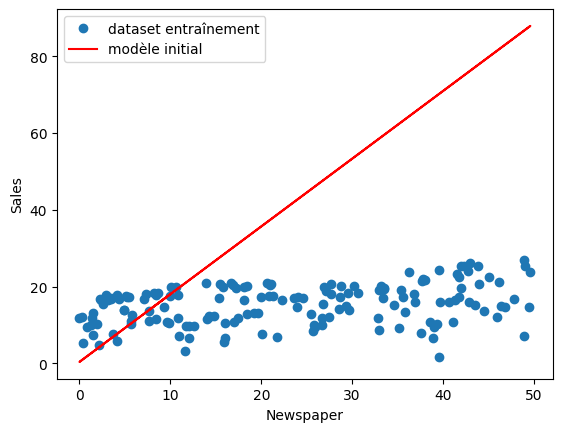

In [ ]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta), c='r',label='modèle initial')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [ ]:
cost_function(X_train, y_train, theta)

629.3835846941762

In [ ]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [ ]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history


In [ ]:
n_iterations = 1000000
learning_rate = 0.00001


theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

In [ ]:
cost_history

array([620.5797391 , 611.90602538, 603.36052   , ...,  11.89314942,
        11.89314906,  11.8931487 ])

In [ ]:
theta_final

array([[ 0.14002984],
       [11.93689611]])

In [ ]:
theta_final[0]


array([0.14002984])

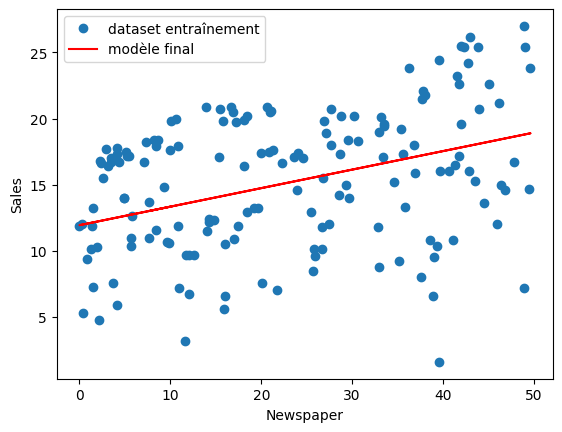

In [ ]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta_final), c='r',label='modèle final')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

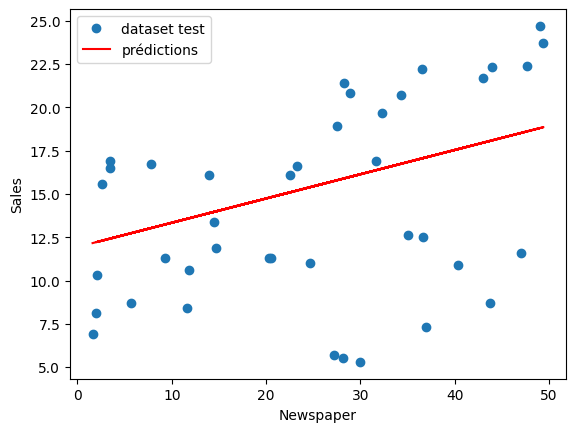

In [ ]:
predictions = model(X_test, theta_final)

# Affichage des résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.plot(x_test,y_test,'o',label='dataset test')
plt.plot(x_test,predictions , c='r',label='prédictions')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

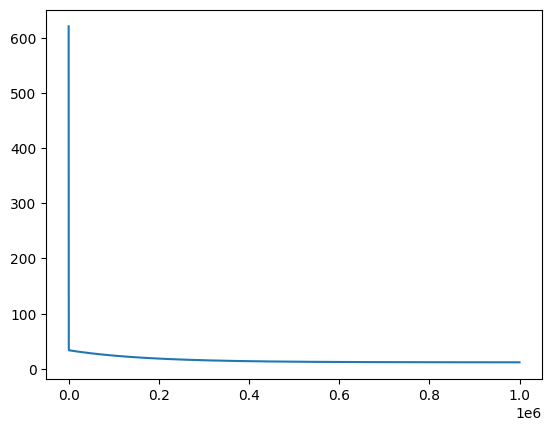

In [ ]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v


In [ ]:
Newspaper_coef_train = coef_determination(y_train, model(X_train, theta_final))
Newspaper_coef_train

0.11243087789278261

In [ ]:
Newspaper_coef_test = coef_determination(y_test, model(X_test, theta_final))
Newspaper_coef_test

0.12422588638376608

In [ ]:
Newspaper_correlation = dataset['Newspaper'].corr(dataset['Sales'])
Newspaper_correlation

0.15796002615492621

In [ ]:
print(TV_coef_train)
print(TV_coef_test)
print(TV_correlation)

0.8102276883921965
0.8005190051199944
0.9012079133023306


In [ ]:
print(Newspaper_coef_train)
print(Newspaper_coef_test)
print(Newspaper_correlation)

0.11243087789278261
0.12422588638376608
0.15796002615492621


In [ ]:
print(Radio_coef_train)
print(Radio_coef_test)
print(Radio_correlation)

0.1124348154931386
0.12422007053313411
0.3496310970076693


In [ ]:
import plotly.express as px

fig = px.scatter_3d(dataset, x='TV', y='Radio', z='Newspaper', color='Sales')

  # Update layout to add axis labels and set scene settings
fig.update_layout(scene=dict(xaxis_title='TV', yaxis_title='Radio', zaxis_title='Newspaper'),
                    scene_camera=dict(eye=dict(x=1.87, y=0.88, z=-0.64)))

  # Show the plot
fig.show()